In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_excel('/content/G2exC AT IPS(2)+TM(A) 2016-05_2021 sim100 Trades.xlsx')

In [158]:
df.head()

,Symbol,Trade Type,Entry DateTime,Exit DateTime,Entry Price,Exit Price,Trade Quantity,Max Open Quantity,Max Closed Quantity,Profit/Loss (C),Cumulative Profit/Loss (C),Duration,High Price While Open,Low Price While Open,Exit Efficiency,Entry Efficiency,FlatToFlat Profit/Loss (C),FlatToFlat Max Open Profit (C),FlatToFlat Max Open Loss (C),Max Open Profit (C),Max Open Loss (C),Note,Total Efficiency,Commission (C),Open Position Quantity,Close Position Quantity
0,[Sim]F.US.GCEQ21 (Sim100),Short,2016-01-03 18:15:17.003 BP,2016-01-03 18:39:34.001000,1063.1,1061.1,1.0,2.0,1.0,195.8,195.8,00:24:16,1063.3,1061.0,0.938,1.0,195.8,210.00,-20.00,210.00,-20.00,IPS2+TM(all),0.851,4.2,2.0,1.0
1,[Sim]F.US.GCEQ21,Short,2016-01-03 18:15:17.003000,2016-01-03 18:42:50.001 EP,1063.1,1062.0,1.0,2.0,2.0,105.8,301.6,00:27:32,1063.3,1061.0,0.317,1.0,301.60 F,420.00,-40.01,210.00,-20.00,IPS2+TM(all),0.230,4.2,2.0,0.0
2,[Sim]F.US.GCEQ21,Long,2016-01-03 19:26:33.003 BP,2016-01-03 20:19:43.001 EP,1063.6,1061.6,2.0,2.0,2.0,-408.4,-106.8,00:53:09,1064.7,1061.6,-0.014,1.0,-408.40 F,220.01,-400.01,220.01,-400.01,IPS2+TM(all),-0.659,8.4,2.0,0.0
3,[Sim]F.US.GCEQ21,Short,2016-01-03 20:19:43.009 BP,2016-01-03 21:27:22.012 EP,1061.6,1063.6,2.0,2.0,2.0,-408.4,-515.2,01:07:39,1063.6,1061.5,-0.020,1.0,-408.40 F,20.00,-400.00,20.00,-400.00,IPS2+TM(all),-0.972,8.4,2.0,0.0
4,[Sim]F.US.GCEQ21,Long,2016-01-03 21:28:48.004 BP,2016-01-04 00:20:14.059000,1063.7,1065.7,1.0,2.0,1.0,195.8,-319.4,02:51:26,1065.8,1062.6,0.956,1.0,195.8,210.00,-110.00,210.00,-110.00,IPS2+TM(all),0.612,4.2,2.0,1.0


In [159]:
df=df.dropna()

In [160]:
df['Entry DateTime'] = pd.to_datetime(df['Entry DateTime'])
df['Exit DateTime'] = pd.to_datetime(df['Exit DateTime'])

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname BP identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EP identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [161]:
df['date']=df['Entry DateTime'].dt.date
df['time']=df['Entry DateTime'].dt.time

In [162]:
df['Trade Type']=df['Trade Type'].apply({'Short':0, 'Long':1}.get)

In [ ]:
df

In [264]:
df1=df[['date','time','Trade Type','Profit/Loss (C)']]

In [265]:
df1.columns

Index(['date', 'time', 'Trade Type', 'Profit/Loss (C)'], dtype='object')

In [266]:
df1

,date,time,Trade Type,Profit/Loss (C)
0,2016-01-03,18:15:17.003000,0,195.8
1,2016-01-03,18:15:17.003000,0,105.8
2,2016-01-03,19:26:33.003000,1,-408.4
3,2016-01-03,20:19:43.009000,0,-408.4
4,2016-01-03,21:28:48.004000,1,195.8
...,...,...,...,...
12996,2021-05-28,10:07:51.567000,0,-408.4
12997,2021-05-28,11:01:09.908000,1,-408.4
12998,2021-05-28,13:55:57.859000,0,-328.4
12999,2021-05-31,02:13:38.890000,1,-428.4


In [ ]:
df1.set_index('date', inplace=False)

In [ ]:
df1

In [48]:
import seaborn as sns

In [267]:
df1['Profit/Loss (C)'].describe()

count     13001.0
unique      136.0
top         195.8
freq       3568.0
Name: Profit/Loss (C), dtype: float64

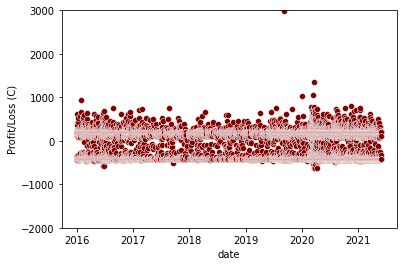

In [271]:
sns.scatterplot(x=df['date'],y=df['Profit/Loss (C)'],color='maroon')
plt.ylim(-2000,3000)
plt.show()

(-700.0, 2500.0)

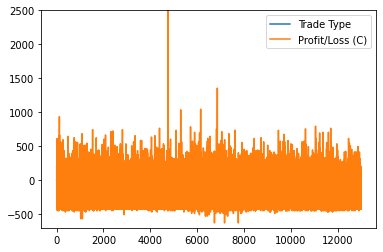

In [272]:
df1.plot()
plt.ylim(-700,2500)

In [171]:
#testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [172]:
test_result=adfuller(df1['Profit/Loss (C)'])

In [173]:
test_result

(-30.801543724865173,
 0.0,
 12,
 12988,
 {'1%': -3.430853587380248,
  '10%': -2.566888464449997,
  '5%': -2.8617625613050963},
 181614.664645079)

In [174]:
#hypothesis testing
#H0 is non-stationary and H1 is stationary


labels=['ADF Test Statistics', 'p_value', '#Lags Used', 'Number of Observations Used']
for value , label in zip(test_result, labels):
   print(label+':'+str(value))
if test_result[1] <= 0.05:
  print("strong evidence against null hypothesis H0") 
else:
  print("weak evidence against null hypothesis H1")

ADF Test Statistics:-30.801543724865173
p_value:0.0
#Lags Used:12
Number of Observations Used:12988
strong evidence against null hypothesis H0


In [178]:
#implementing the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [220]:
model=ARIMA(np.asarray(df1['Profit/Loss (C)']), order=(1,0,1))
model_fit=model.fit(disp=1)

In [221]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                13001
Model:                     ARMA(1, 1)   Log Likelihood              -91103.418
Method:                       css-mle   S.D. of innovations            267.325
Date:                Tue, 27 Jul 2021   AIC                         182214.837
Time:                        13:46:22   BIC                         182244.728
Sample:                             0   HQIC                        182224.824
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9086      2.877      1.011      0.312      -2.730       8.547
ar.L1.y       -0.4787      0.014    -34.740      0.000      -0.506      -0.452
ma.L1.y        0.8144      0.009     90.046      0.000       0.797       0.832
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0891           +0.0000j            2.0891            0.5000
MA.1           -1.2278           +0.0000j            1.2278            0.5000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-500.0, 500.0)

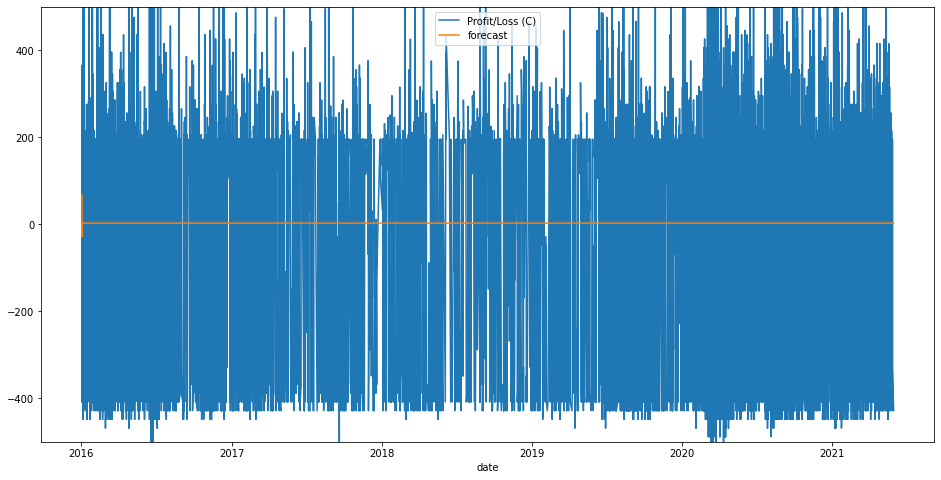

In [227]:
df1['forecast']=model_fit.predict(start=1, end=13001, dynamic=True)
df1[['Profit/Loss (C)', 'forecast']].plot(figsize=(16,8))
plt.ylim(-500,500)

In [250]:
x=df['date'].values.reshape(-1,1)

In [242]:
y=df1['forecast'].values.reshape(-1,1)

In [223]:
df1['forecast']

date
2016-01-03    67.675707
2016-01-03   -28.093877
2016-01-03    17.748788
2016-01-03    -4.195026
2016-01-03     6.308966
                ...    
2021-05-28     2.908618
2021-05-28     2.908618
2021-05-28     2.908618
2021-05-31     2.908618
2021-05-31     2.908618
Name: forecast, Length: 13001, dtype: float64

In [182]:
import statsmodels.api as sm

In [259]:
model=sm.tsa.statespace.SARIMAX(pd.isna(np.asarray(df1['Profit/Loss (C)'])), order=(1,0,1), seasonal_order=(0, 0, 0, 0))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [186]:
len(df1)

13001

In [187]:
from pandas.tseries.offsets import  DateOffset
fcast=model_fit.predict(start=13001, end=13040, dynamic=True)

In [ ]:
df1['forecast'].values.reshape(-1,1)

(-500.0, 500.0)

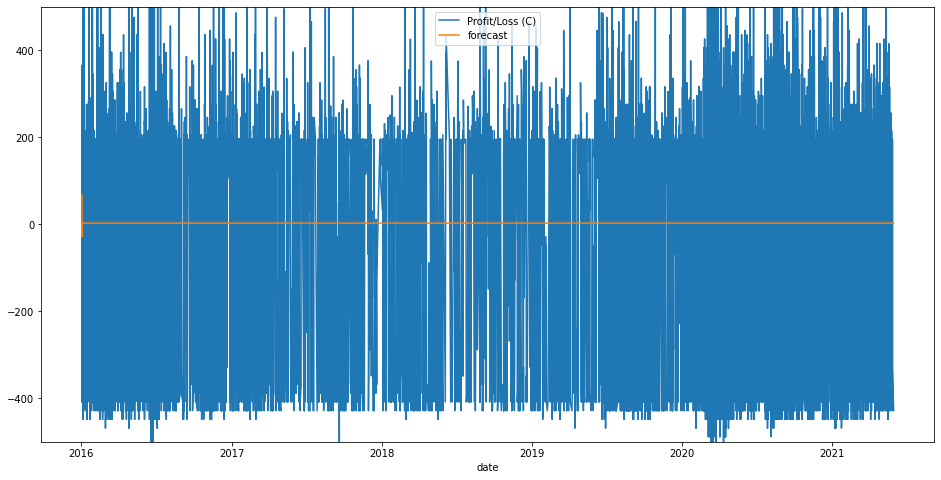

In [262]:
df1[['Profit/Loss (C)', 'forecast']].plot(figsize=(16,8))
plt.ylim(-500,500)

In [282]:
#forecasting for next 3 months
from pandas.tseries.offsets import DateOffset
future_dates=['df1.index[-1] + DateOffset(months=x) for x in range(0,3)']

In [275]:
future_dates_df1=pd.DataFrame(index=future_dates[1:], columns=df1.columns)

In [276]:
future_dates_df1

,date,time,Trade Type,Profit/Loss (C)


In [277]:
future_df1=pd.concat([df1, future_dates_df1])

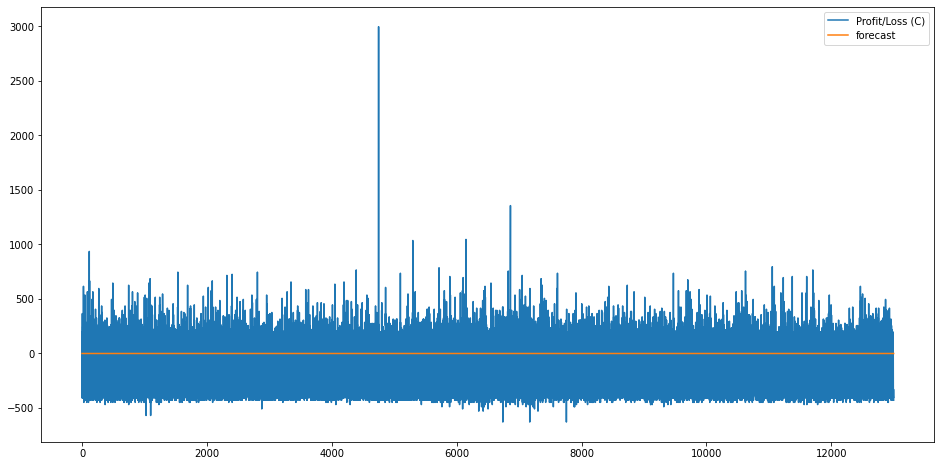

In [278]:
future_df1['forecast']=results.predict(start=13001, end=26001, dynamic=True)
future_df1[['Profit/Loss (C)', 'forecast']].plot(figsize=(16,8))

In [280]:
future_df1.tail(10)

,date,time,Trade Type,Profit/Loss (C),forecast
12991,2021-05-28,05:26:50.683000,0,-408.4,0.0
12992,2021-05-28,08:16:31.983000,1,195.8,0.0
12993,2021-05-28,08:16:31.983000,1,105.8,0.0
12994,2021-05-28,08:30:07.196000,0,-388.4,0.0
12995,2021-05-28,09:13:56.341000,0,-388.4,0.0
12996,2021-05-28,10:07:51.567000,0,-408.4,0.0
12997,2021-05-28,11:01:09.908000,1,-408.4,0.0
12998,2021-05-28,13:55:57.859000,0,-328.4,0.0
12999,2021-05-31,02:13:38.890000,1,-428.4,0.0
13000,2021-05-31,09:11:08.273000,0,-428.4,0.0


In [207]:
future_df1['forecast'].unique()

array([0.])